In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
obj = SentimentIntensityAnalyzer()

In [3]:
sentence = "Pizza tastes good"
sentiment_dict = obj.polarity_scores(sentence)
print(sentiment_dict)

{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Austin\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [6]:
df = pd.read_csv('vaccine_tweets.csv')

In [7]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1.340540e+18,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,4/8/2009 17:52,405,1692,3247,False,12/20/2020 6:06,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1.338160e+18,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",9/21/2009 15:27,834,666,178,False,12/13/2020 16:27,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1.337860e+18,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",6/25/2020 23:30,10,88,155,False,12/12/2020 20:33,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1.337860e+18,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",9/10/2008 11:28,49165,3933,21853,True,12/12/2020 20:23,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1.337850e+18,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,4/23/2020 17:58,152,580,1473,False,12/12/2020 20:17,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                11020 non-null  float64
 1   user_name         11020 non-null  object 
 2   user_location     8750 non-null   object 
 3   user_description  10341 non-null  object 
 4   user_created      11020 non-null  object 
 5   user_followers    11020 non-null  int64  
 6   user_friends      11020 non-null  int64  
 7   user_favourites   11020 non-null  int64  
 8   user_verified     11020 non-null  bool   
 9   date              11020 non-null  object 
 10  text              11020 non-null  object 
 11  hashtags          8438 non-null   object 
 12  source            11019 non-null  object 
 13  retweets          11020 non-null  int64  
 14  favorites         11020 non-null  int64  
 15  is_retweet        11020 non-null  bool   
dtypes: bool(2), float64(1), int64(5), object

In [9]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Austin\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [10]:
import seaborn as sns

In [11]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Austin\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [13]:
wordlist=df['text']

In [14]:
cleanlist=[]
emptyline=[]
for row in wordlist:
    clean_tweet = ""
    tokenized_tweet = row.split(" ")
    for x in tokenized_tweet:
        if(len(x) >= 20):
            tokenized_tweet.remove(x)
    for x in tokenized_tweet:
        clean_tweet += (x + " ")
    cleanlist.append(clean_tweet)
    vs=analyzer.polarity_scores(clean_tweet)
    emptyline.append(vs)
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.00,0.787,0.213,0.4019
1,0.13,0.756,0.113,-0.1027
2,0.00,0.867,0.133,0.2500
3,0.00,1.000,0.000,0.0000
4,0.00,1.000,0.000,0.0000


In [15]:
df["cleantext"] = cleanlist
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,cleantext
0,1.340540e+18,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,4/8/2009 17:52,405,1692,3247,False,12/20/2020 6:06,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,Same folks said daikon paste could treat a cyt...
1,1.338160e+18,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",9/21/2009 15:27,834,666,178,False,12/13/2020 16:27,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,While the world has been on the wrong side of ...
2,1.337860e+18,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",6/25/2020 23:30,10,88,155,False,12/12/2020 20:33,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,1.337860e+18,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",9/10/2008 11:28,49165,3933,21853,True,12/12/2020 20:23,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,"Facts are immutable, Senator, even when you're..."
4,1.337850e+18,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,4/23/2020 17:58,152,580,1473,False,12/12/2020 20:17,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,Explain to me again why we need a vaccine @Bor...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11015,1.460930e+18,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,7/29/2009 1:58,151937,465,593,False,11/17/2021 11:27,"The number of Covid-19 cases today, 17 Novembe...",NaN,Twitter Web App,2,6,False,"The number of Covid-19 cases today, 17 Novembe..."
11016,1.460810e+18,Sujan,NaN,________________________ •Napricorn• •It's jus...,1/28/2013 11:48,4259,622,156941,False,11/17/2021 3:17,First dose ✅\n#PfizerBioNTech,['PfizerBioNTech'],Twitter for Android,0,4,False,First dose ✅\n#PfizerBioNTech
11017,1.460580e+18,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,7/29/2009 1:58,151937,465,593,False,11/16/2021 12:14,"The number of Covid-19 cases today, 16 Novembe...",NaN,Twitter Web App,3,5,False,"The number of Covid-19 cases today, 16 Novembe..."
11018,1.460340e+18,Aleksejs Jackovs,Ireland,#Scientificresearcher in #InformationTechnolog...,8/13/2012 13:47,1,38,99,False,11/15/2021 20:29,#PfizerBioNTech has developed new pill #Paxlov...,"['PfizerBioNTech', 'Paxlovid', 'COVID19']",Twitter Web App,1,1,False,#PfizerBioNTech has developed new pill #Paxlov...


In [16]:
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,hashtags,source,retweets,favorites,is_retweet,cleantext,neg,neu,pos,compound
0,1.340540e+18,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,4/8/2009 17:52,405,1692,3247,False,12/20/2020 6:06,...,['PfizerBioNTech'],Twitter for Android,0,0,False,Same folks said daikon paste could treat a cyt...,0.00,0.787,0.213,0.4019
1,1.338160e+18,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",9/21/2009 15:27,834,666,178,False,12/13/2020 16:27,...,NaN,Twitter Web App,1,1,False,While the world has been on the wrong side of ...,0.13,0.756,0.113,-0.1027
2,1.337860e+18,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",6/25/2020 23:30,10,88,155,False,12/12/2020 20:33,...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,0.00,0.867,0.133,0.2500


In [17]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                11020 non-null  float64
 1   user_name         11020 non-null  object 
 2   user_location     8750 non-null   object 
 3   user_description  10341 non-null  object 
 4   user_created      11020 non-null  object 
 5   user_followers    11020 non-null  int64  
 6   user_friends      11020 non-null  int64  
 7   user_favourites   11020 non-null  int64  
 8   user_verified     11020 non-null  bool   
 9   date              11020 non-null  object 
 10  text              11020 non-null  object 
 11  hashtags          8438 non-null   object 
 12  source            11019 non-null  object 
 13  retweets          11020 non-null  int64  
 14  favorites         11020 non-null  int64  
 15  is_retweet        11020 non-null  bool   
 16  cleantext         11020 non-null  object

In [18]:
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive','Negative')
df_c.head(5)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,source,retweets,favorites,is_retweet,cleantext,neg,neu,pos,compound,Sentiment
0,1.340540e+18,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,4/8/2009 17:52,405,1692,3247,False,12/20/2020 6:06,...,Twitter for Android,0,0,False,Same folks said daikon paste could treat a cyt...,0.00,0.787,0.213,0.4019,Positive
1,1.338160e+18,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",9/21/2009 15:27,834,666,178,False,12/13/2020 16:27,...,Twitter Web App,1,1,False,While the world has been on the wrong side of ...,0.13,0.756,0.113,-0.1027,Negative
2,1.337860e+18,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",6/25/2020 23:30,10,88,155,False,12/12/2020 20:33,...,Twitter for Android,0,0,False,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,0.00,0.867,0.133,0.2500,Positive
3,1.337860e+18,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",9/10/2008 11:28,49165,3933,21853,True,12/12/2020 20:23,...,Twitter Web App,446,2129,False,"Facts are immutable, Senator, even when you're...",0.00,1.000,0.000,0.0000,Positive
4,1.337850e+18,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,4/23/2020 17:58,152,580,1473,False,12/12/2020 20:17,...,Twitter for iPhone,0,0,False,Explain to me again why we need a vaccine @Bor...,0.00,1.000,0.000,0.0000,Positive


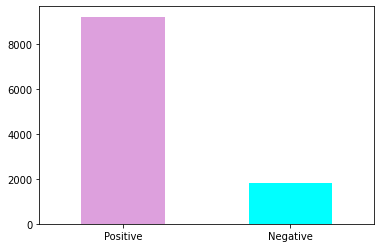

In [19]:
result=df_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['plum','cyan']);

In [20]:
pip install wordcloud

You should consider upgrading via the 'C:\Users\Austin\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [21]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

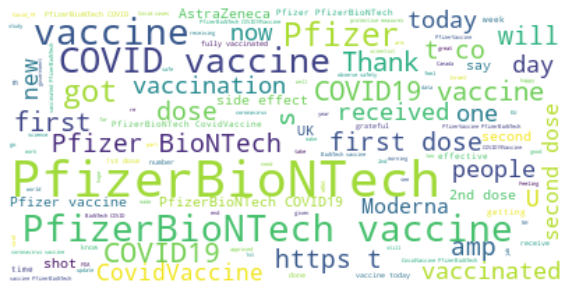

In [22]:
test_str = ""
for row in df['cleantext']:
   test_str += row
wordcloud = WordCloud(background_color='white').generate(test_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
negative = df_c[df_c['Sentiment'] == 'Negative']
positive = df_c[df_c['Sentiment'] == 'Positive']

In [24]:
# Transform to single string
negative_str = ""
positive_str = ""
for row in negative['cleantext']:
    negative_str += row
for row in positive['cleantext']:
    positive_str += row

In [25]:
negative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1821 entries, 1 to 11011
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1821 non-null   float64
 1   user_name         1821 non-null   object 
 2   user_location     1384 non-null   object 
 3   user_description  1665 non-null   object 
 4   user_created      1821 non-null   object 
 5   user_followers    1821 non-null   int64  
 6   user_friends      1821 non-null   int64  
 7   user_favourites   1821 non-null   int64  
 8   user_verified     1821 non-null   bool   
 9   date              1821 non-null   object 
 10  text              1821 non-null   object 
 11  hashtags          1303 non-null   object 
 12  source            1821 non-null   object 
 13  retweets          1821 non-null   int64  
 14  favorites         1821 non-null   int64  
 15  is_retweet        1821 non-null   bool   
 16  cleantext         1821 non-null   object 

Text(0.5, 1.0, 'Reviews with Negative Scores')

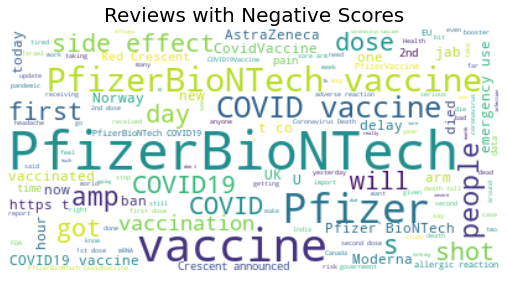

In [26]:
wordcloud_negative = WordCloud(background_color='white').generate(negative_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_str)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)

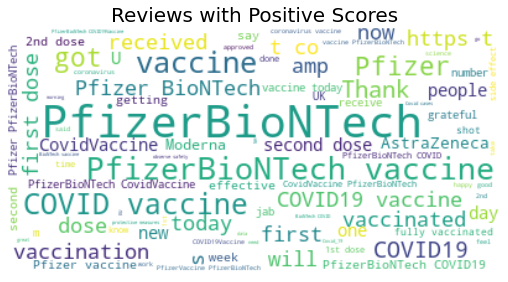

In [27]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

In [28]:
from nltk.corpus import stopwords

In [29]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Austin\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [30]:
stop = stopwords.words('english')

In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Austin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
negative['cleantext'] = negative['cleantext'].apply(lambda x: " ".join(x for x in
x.split() if x not in stop))
negative.text.head()

C:\Users\Austin\AppData\Local\Temp\ipykernel_22140\2846202488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative['cleantext'] = negative['cleantext'].apply(lambda x: " ".join(x for x in


1     While the world has been on the wrong side of ...
18    .@Pfizer will rake in billions from its expens...
19    The trump administration failed to deliver on ...
23    The US Food and Drug Administration (FDA) has ...
30    @ZubyMusic 6 deaths so far. \nIt's only death,...
Name: text, dtype: object

In [33]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
stop.append('https//t')
stop.append('t.co')
stop.append('amp')
stop.append('https://t.co/')
stop.append('PfizerBioNTech')
stop.append('day')

In [35]:
df.to_csv("clean_dataset.csv")

In [36]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,cleantext
0,1.340540e+18,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,4/8/2009 17:52,405,1692,3247,False,12/20/2020 6:06,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,Same folks said daikon paste could treat a cyt...
1,1.338160e+18,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",9/21/2009 15:27,834,666,178,False,12/13/2020 16:27,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,While the world has been on the wrong side of ...
2,1.337860e+18,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",6/25/2020 23:30,10,88,155,False,12/12/2020 20:33,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,1.337860e+18,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",9/10/2008 11:28,49165,3933,21853,True,12/12/2020 20:23,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,"Facts are immutable, Senator, even when you're..."
4,1.337850e+18,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,4/23/2020 17:58,152,580,1473,False,12/12/2020 20:17,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,Explain to me again why we need a vaccine @Bor...
